In [1]:
# Imports
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import prepare_github as prepare
from wordcloud import WordCloud


In [2]:
# Read data into a dataframe
df = pd.read_csv('data.csv')

In [3]:
# Show first few rows
df.head()

,repo,language,readme_contents
0,imartinez/privateGPT,Python,# privateGPT\nAsk questions to your documents ...
1,Gioman101/FlipperAmiibo,Python,# FlipperAmiibo\nA collection of FlipperZero N...
2,yuzu-emu/yuzu,C++,<!--\nSPDX-FileCopyrightText: 2018 yuzu Emulat...
3,AUTOMATIC1111/stable-diffusion-webui,Python,# Stable Diffusion web UI\r\nA browser interfa...
4,go-skynet/LocalAI,Go,"<h1 align=""center"">\n <br>\n <img height=""30..."


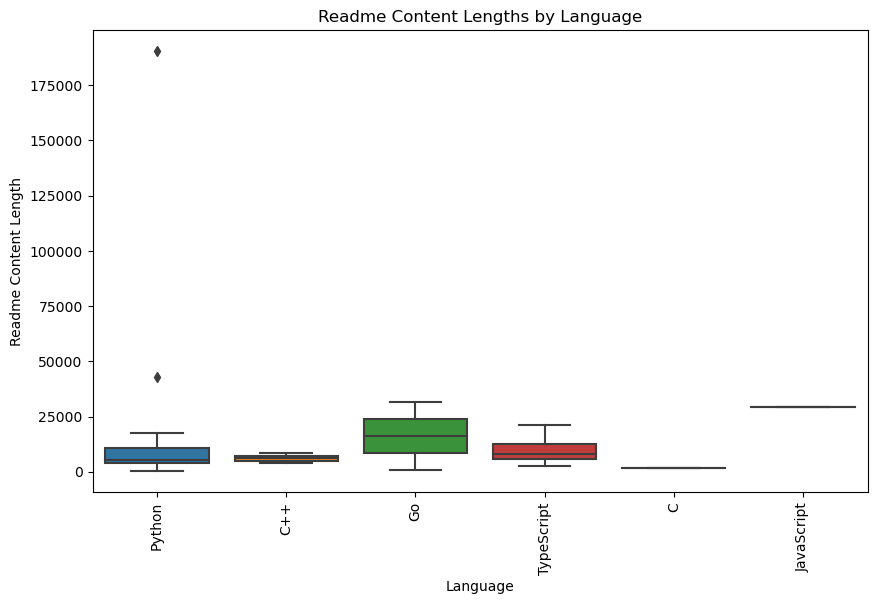

In [4]:
# Add a column for readme content lengths
df['readme_length'] = df['readme_contents'].apply(len)

# Box plot of readme content lengths by language
plt.figure(figsize=(10, 6))
sns.boxplot(x='language', y='readme_length', data=df)
plt.title('Readme Content Lengths by Language')
plt.xlabel('Language')
plt.ylabel('Readme Content Length')
plt.xticks(rotation=90)
plt.show()

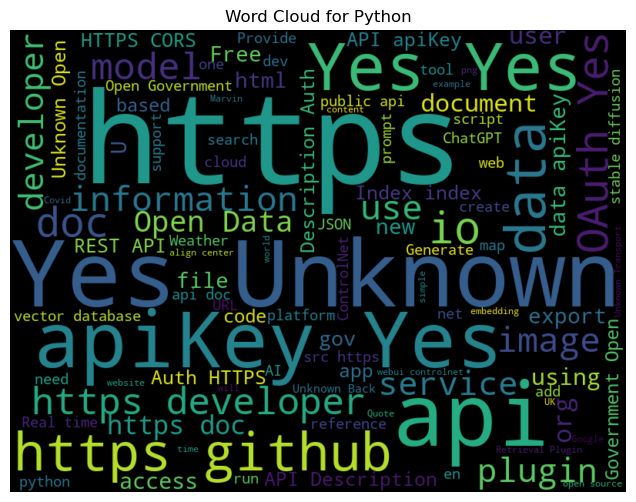

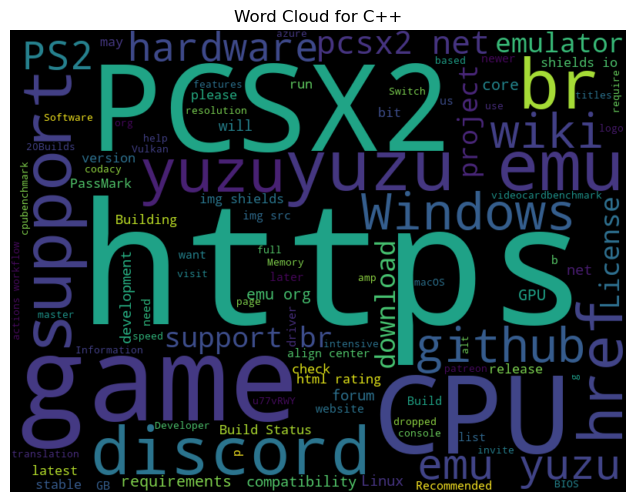

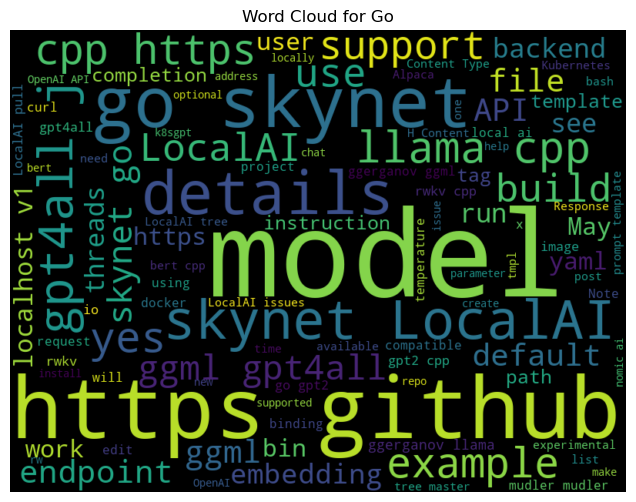

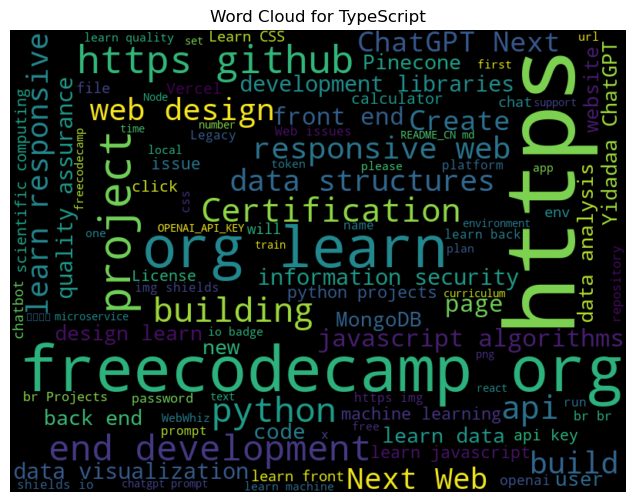

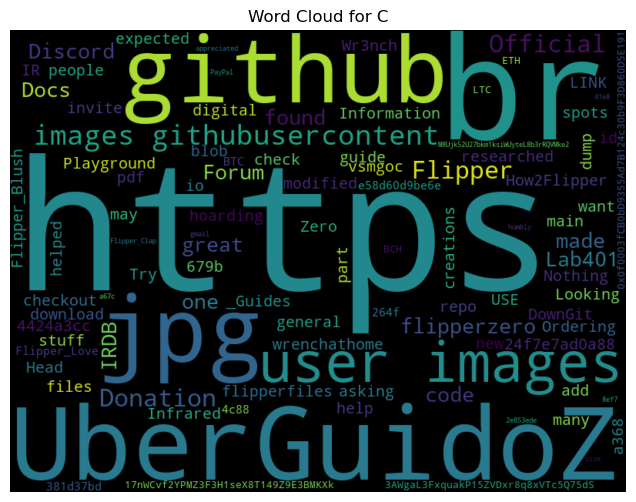

ValueError: We need at least 1 word to plot a word cloud, got 0.

<Figure size 800x600 with 0 Axes>

In [5]:
# Create a word cloud for each language
languages = df['language'].unique()
for language in languages:
    plt.figure(figsize=(8, 6))
    subset = df[df['language'] == language]
    text = ' '.join(subset['readme_contents'])
    wordcloud = WordCloud(width=800, height=600, max_words=100).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {language}')
    plt.axis('off')
    plt.show()


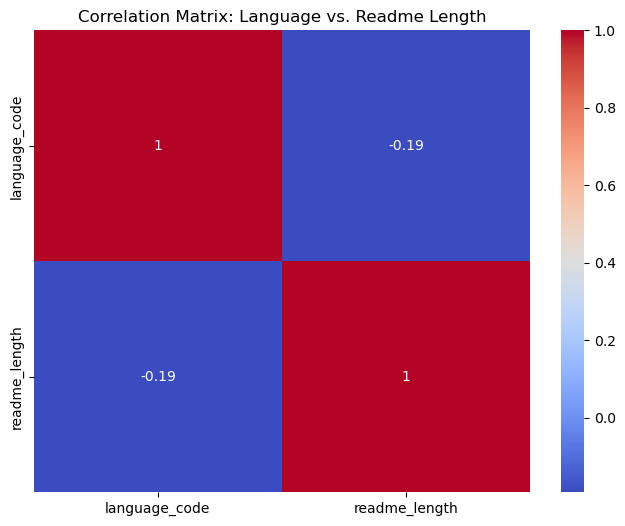

In [6]:
# Convert language labels to numerical values
df['language_code'] = df['language'].astype('category').cat.codes

# Compute correlation matrix
corr_matrix = df[['language_code', 'readme_length']].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Language vs. Readme Length')
plt.show()


In [7]:
# Call prepare function 
df = prepare.transform_data(df)

In [8]:
# Verify updated values
df.head()

,repo,language,original,readme_length,language_code,clean,stemmed,lematized
0,imartinez/privateGPT,Python,# privateGPT\nAsk questions to your documents ...,5239,4,privategpt ask questions documents without int...,privategpt ask question document without inter...,privategpt ask question document without inter...
1,Gioman101/FlipperAmiibo,Python,# FlipperAmiibo\nA collection of FlipperZero N...,283,4,flipperamiibo collection flipperzero nfc files...,flipperamiibo collect flipperzero nfc file emu...,flipperamiibo collection flipperzero nfc file ...
2,yuzu-emu/yuzu,C++,<!--\nSPDX-FileCopyrightText: 2018 yuzu Emulat...,3883,1,spdxfilecopyrighttext 2018 yuzu emulator proje...,spdxfilecopyrighttext 2018 yuzu emul project s...,spdxfilecopyrighttext 2018 yuzu emulator proje...
3,AUTOMATIC1111/stable-diffusion-webui,Python,# Stable Diffusion web UI\r\nA browser interfa...,10801,4,stable diffusion web ui browser interface base...,stabl diffus web ui browser interfac base grad...,stable diffusion web ui browser interface base...
4,go-skynet/LocalAI,Go,"<h1 align=""center"">\n <br>\n <img height=""30...",31802,2,h1 aligncenter br img height300 srchttpsuserim...,h1 aligncent br img height300 srchttpsuserimag...,h1 aligncenter br img height300 srchttpsuserim...


In [9]:
# Check the shape of the DataFrame
df.shape

(25, 8)

In [10]:
# Get summary statistics of the DataFrame
df.describe()

,readme_length,language_code
count,25.0000,25.000000
mean,22174.1600,3.160000
std,40299.5715,1.818424
min,283.0000,-1.000000
25%,3862.0000,2.000000
50%,6899.0000,4.000000
75%,21409.0000,4.000000
max,190404.0000,5.000000


Python        13
TypeScript     4
C++            2
Go             2
C              1
JavaScript     1
Name: language, dtype: int64


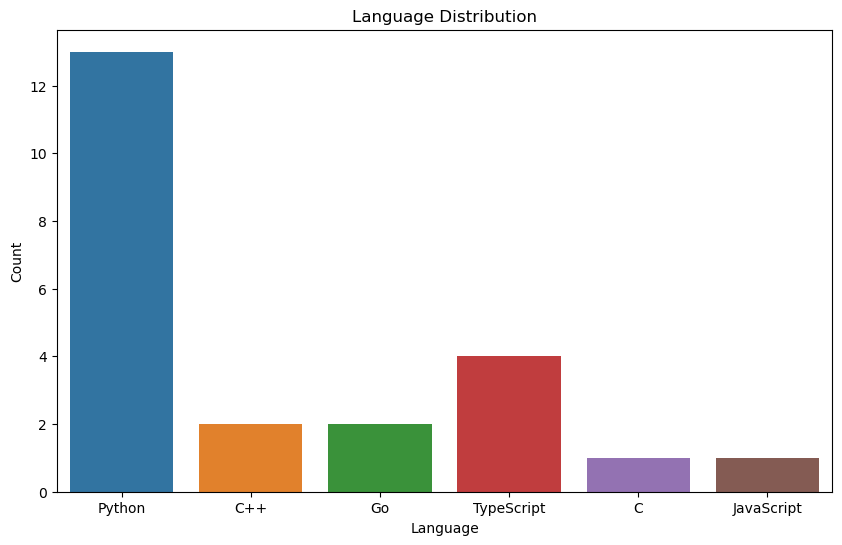

In [11]:
# Count the number of each language
language_counts = df['language'].value_counts()
print(language_counts)

# Language distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='language', data=df)
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()


In [ ]:
# Extract the feature and target variables
X = df['stemmed']
y = df['language']

# Create a bag-of-words representation of the text data
vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(X)
